In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Overview

#### Shared link for my dataset
- Inside my github repo: (https://github.com/fgao38/MACSS-30100/tree/main/real_estate)
    - file: (https://github.com/fgao38/MACSS-30100/blob/main/real_estate/Real%20Estate%20Dataset.csv)
- Originally downloaded from Kaggle: https://www.kaggle.com/datasets/arnoldkakas/real-estate-dataset

In [2]:
# read data from file to a pandas dataframe
data_df = pd.read_csv('real_estate/Real Estate Dataset.csv', sep=';')


In [3]:
data_df.shape

(15403, 27)

In [4]:
# get an overview of the top-n rows/samples
data_df.head()

,name_nsi,price,index,environment,quality_of_living,safety,transport,services,relax,condition,...,last_reconstruction,total_floors,floor,lift,balkonies,loggia,cellar,type,rooms,district
0,Semerovo,42000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Original condition,...,NaN,NaN,NaN,0,NaN,NaN,0,3-room apartment,3,Nové Zámky
1,Semerovo,42000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Original condition,...,NaN,2.0,NaN,0,NaN,NaN,0,3-room apartment,3,Nové Zámky
2,Štúrovo,107000,"8,3",NaN,NaN,NaN,NaN,NaN,NaN,Partial reconstruction,...,NaN,5.0,3.0,0,NaN,NaN,0,1-room apartment,1,Nové Zámky
3,Štúrovo,105000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete reconstruction,...,NaN,7.0,4.0,1,NaN,NaN,0,3-room apartment,3,Nové Zámky
4,Štúrovo,82000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Partial reconstruction,...,2018.0,NaN,2.0,0,NaN,NaN,0,2-room apartment,2,Nové Zámky


# Data Cleaning
## Checking missing values

In [5]:
null_sum = data_df.isnull().sum()
null_sum

name_nsi                   0
price                      0
index                  10241
environment            11271
quality_of_living      11271
safety                 11271
transport              11271
services               11271
relax                  11271
condition                327
area                     716
energy_costs           14423
provision                  0
certificate             8958
construction_type      13036
orientation            14380
year_built             11525
last_reconstruction    14721
total_floors            8117
floor                   7087
lift                       0
balkonies              13636
loggia                 13883
cellar                     0
type                       0
rooms                      0
district                   0
dtype: int64

In [6]:
# Drop columns that have at least 70% missing values 
data_df.drop(columns=data_df.columns[null_sum > len(data_df) * 0.7], inplace=True)

In [7]:
# check the remaining columns
data_df.shape, data_df.columns

# originally I had 27 columns, now I have 14.

((15403, 14),
 Index(['name_nsi', 'price', 'index', 'condition', 'area', 'provision',
        'certificate', 'total_floors', 'floor', 'lift', 'cellar', 'type',
        'rooms', 'district'],
       dtype='object'))

In [8]:
# check the data types: columns with mixed types are stored with the object dtype.
data_df.dtypes 

name_nsi         object
price             int64
index            object
condition        object
area             object
provision         int64
certificate      object
total_floors    float64
floor           float64
lift              int64
cellar            int64
type             object
rooms             int64
district         object
dtype: object

In [9]:
def replace_commas_with_periods(value):
    return value.replace(',', '.')
data_df[['index', 'area']] = data_df[['index', 'area']].applymap(lambda x: replace_commas_with_periods(x) if isinstance(x, str) else x)

In [10]:
print(data_df)

                name_nsi   price index                condition area  \
0               Semerovo   42000   NaN       Original condition   58   
1               Semerovo   42000   NaN       Original condition   58   
2                Štúrovo  107000   8.3   Partial reconstruction   40   
3                Štúrovo  105000   NaN  Complete reconstruction   76   
4                Štúrovo   82000   NaN   Partial reconstruction   63   
...                  ...     ...   ...                      ...  ...   
15398  Vranov nad Topľou  118990   NaN       Original condition   88   
15399  Vranov nad Topľou  117650   NaN  Complete reconstruction   70   
15400  Vranov nad Topľou   89990   NaN   Partial reconstruction   67   
15401  Vranov nad Topľou  139990   NaN  Complete reconstruction  138   
15402  Vranov nad Topľou  132000   NaN  Complete reconstruction   72   

       provision certificate  total_floors  floor  lift  cellar  \
0              0         NaN           NaN    NaN     0       0   
1

## Process Categorical Columns

In [11]:
# Convert the following columns to categorical data types 
cat_col = ['name_nsi', 'condition', 'certificate', 'type', 'district']
data_df[cat_col] = data_df[cat_col].astype('category')
data_df[cat_col]

,name_nsi,condition,certificate,type,district
0,Semerovo,Original condition,NaN,3-room apartment,Nové Zámky
1,Semerovo,Original condition,none,3-room apartment,Nové Zámky
2,Štúrovo,Partial reconstruction,NaN,1-room apartment,Nové Zámky
3,Štúrovo,Complete reconstruction,C,3-room apartment,Nové Zámky
4,Štúrovo,Partial reconstruction,NaN,2-room apartment,Nové Zámky
...,...,...,...,...,...
15398,Vranov nad Topľou,Original condition,NaN,4-room apartment,Vranov nad Topľou
15399,Vranov nad Topľou,Complete reconstruction,NaN,3-room apartment,Vranov nad Topľou
15400,Vranov nad Topľou,Partial reconstruction,NaN,3-room apartment,Vranov nad Topľou
15401,Vranov nad Topľou,Complete reconstruction,NaN,4-room apartment,Vranov nad Topľou


In [12]:
# the following columns now all have the categorical data types
data_df[cat_col].dtypes

name_nsi       category
condition      category
certificate    category
type           category
district       category
dtype: object

In [13]:
# count the #samples fall into each category
data_df['name_nsi'].value_counts() 

Bratislava - mestská časť Ružinov        979
Bratislava - mestská časť Staré Mesto    661
Bratislava - mestská časť Petržalka      643
Žilina                                   441
Nitra                                    413
                                        ... 
Košice - mestská časť Ťahanovce            1
Tešedíkovo                                 1
Košice - mestská časť Myslava              1
Košice - mestská časť Kavečany             1
Mýtna                                      1
Name: name_nsi, Length: 598, dtype: int64

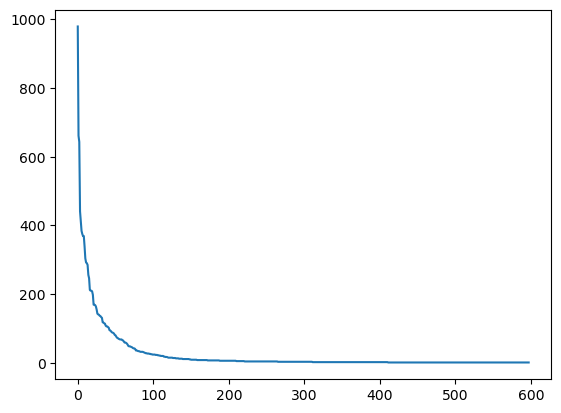

In [14]:
# an alternative method to check the #samples in each category
plt.plot(data_df['name_nsi'].value_counts().values)

In [15]:
# a closer look at the #samples in each category
data_df['name_nsi'].value_counts().values

array([979, 661, 643, 441, 413, 384, 375, 369, 369, 339, 304, 292, 290,
       285, 256, 246, 212, 210, 210, 208, 198, 169, 169, 168, 164, 155,
       143, 141, 140, 137, 136, 133, 131, 118, 117, 115, 114, 108, 106,
       106, 104, 102,  95,  94,  92,  89,  88,  87,  85,  81,  80,  76,
        73,  72,  70,  69,  68,  68,  68,  66,  65,  62,  59,  59,  58,
        56,  53,  49,  48,  48,  47,  46,  45,  43,  42,  42,  40,  36,
        36,  35,  34,  34,  33,  32,  32,  32,  32,  31,  30,  29,  28,
        28,  27,  27,  27,  26,  26,  25,  25,  24,  24,  24,  24,  23,
        23,  23,  22,  22,  21,  21,  20,  20,  20,  20,  18,  18,  17,
        17,  17,  16,  15,  15,  15,  15,  15,  15,  14,  14,  14,  14,
        13,  13,  13,  13,  12,  12,  12,  12,  12,  11,  11,  11,  11,
        11,  11,  11,  11,  11,  10,  10,   9,   9,   9,   9,   9,   9,
         9,   9,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,
         8,   8,   8,   7,   7,   7,   7,   7,   7,   7,   7,   

In [16]:
# count the #samples fall into each category
data_df['condition'].value_counts() 

Complete reconstruction    4389
New building               4074
Partial reconstruction     3953
Original condition         2148
Under construction          441
Development project          71
Name: condition, dtype: int64

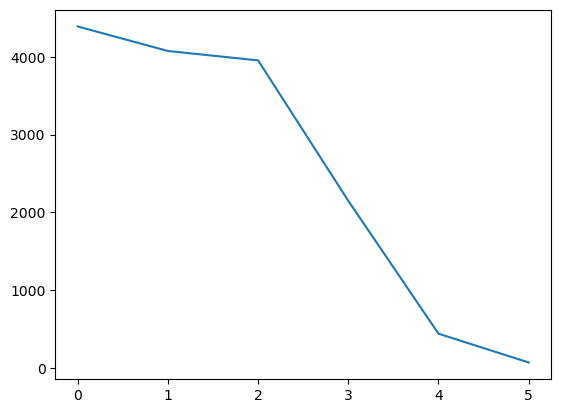

In [17]:
# an alternative method to check the #samples in each category
plt.plot(data_df['condition'].value_counts().values)

In [18]:
# a closer look at the #samples in each category
data_df['condition'].value_counts().values

array([4389, 4074, 3953, 2148,  441,   71])

In [19]:
# count the #samples fall into each category
data_df['certificate'].value_counts() 

none    3748
A       1404
B       1027
C        160
G         72
D         23
E          7
F          4
Name: certificate, dtype: int64

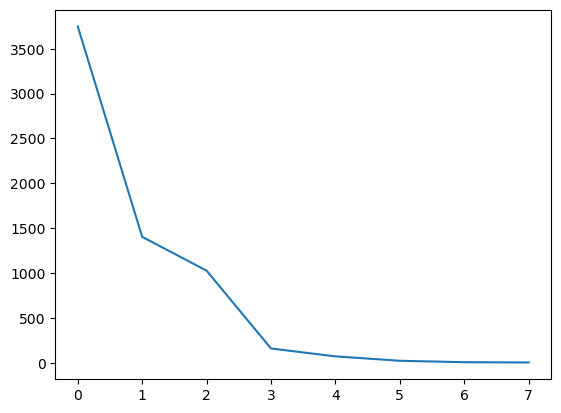

In [20]:
# an alternative method to check the #samples in each category
plt.plot(data_df['certificate'].value_counts().values)

In [21]:
# a closer look at the #samples in each category
data_df['certificate'].value_counts().values

array([3748, 1404, 1027,  160,   72,   23,    7,    4])

In [22]:
# count the #samples fall into each category
data_df['type'].value_counts() 

3-room apartment            6171
2-room apartment            5245
1-room apartment            1820
4-room apartment            1529
Studio                       427
5 or more room apartment     147
Two-room apartment            64
Name: type, dtype: int64

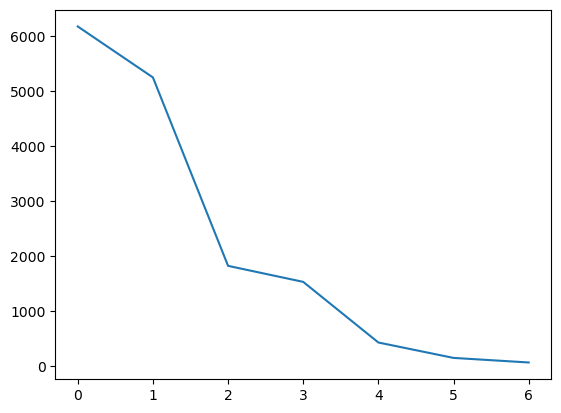

In [23]:
# an alternative method to check the #samples in each category
plt.plot(data_df['type'].value_counts().values)

In [24]:
# a closer look at the #samples in each category
data_df['type'].value_counts().values

array([6171, 5245, 1820, 1529,  427,  147,   64])

In [25]:
# count the #samples fall into each category
data_df['district'].value_counts() 

Bratislava II     1360
Bratislava IV      778
Bratislava V       673
Bratislava I       661
Bratislava III     571
                  ... 
Sabinov              8
Svidník              8
Gelnica              6
Tvrdošín             5
Stropkov             2
Name: district, Length: 79, dtype: int64

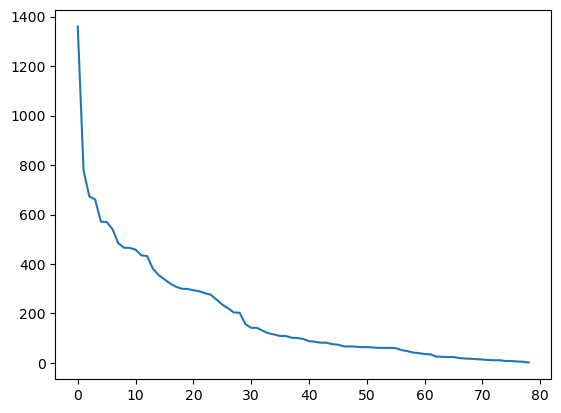

In [26]:
# an alternative method to check the #samples in each category
plt.plot(data_df['district'].value_counts().values)

In [27]:
# a closer look at the #samples in each category
data_df['district'].value_counts().values

array([1360,  778,  673,  661,  571,  570,  541,  484,  466,  465,  458,
        435,  432,  381,  355,  338,  321,  308,  300,  299,  294,  290,
        282,  276,  256,  236,  221,  204,  203,  157,  142,  142,  130,
        120,  115,  109,  109,  102,  101,   97,   88,   86,   82,   82,
         76,   74,   67,   67,   66,   64,   64,   63,   61,   61,   61,
         60,   52,   48,   42,   40,   36,   35,   26,   25,   24,   24,
         20,   18,   17,   15,   14,   12,   11,   11,    8,    8,    6,
          5,    2])

## Removing outlier category

In [28]:
# remove samples whose "name_nsi" belongs to the minority categories 
# our criteria here is to remove categories that have less than 10 samples
value_cts = data_df['name_nsi'].value_counts()
cat_to_remove = value_cts[value_cts < 10].keys()
cat_to_remove

CategoricalIndex(['Sečovce', 'Nová Dedinka', 'Vydrany', 'Podbrezová',
                  'Kvetoslavov', 'Turzovka', 'Malé Borové', 'Podhájska',
                  'Bošany', 'Turčianska Štiavnička',
                  ...
                  'Svrčinovec', 'Kráľ', 'Svätý Anton', 'Krpeľany',
                  'Tekovské Lužany', 'Košice - mestská časť Ťahanovce',
                  'Tešedíkovo', 'Košice - mestská časť Myslava',
                  'Košice - mestská časť Kavečany', 'Mýtna'],
                 categories=['Andovce', 'Babindol', 'Babiná', 'Banka', ..., 'Želovce', 'Žiar nad Hronom', 'Žilina', 'Žitavany'], ordered=False, dtype='category', length=448)

In [29]:
print("Data size before dropping minority categories:", data_df.shape)
data_df.drop(data_df[data_df['name_nsi'].isin(cat_to_remove)].index, inplace=True)
print("Data size after dropping minority categories:", data_df.shape)

Data size before dropping minority categories: (15403, 14)
Data size after dropping minority categories: (14219, 14)


In [30]:
# double check the remaining categories 
data_df['name_nsi'].astype('string').value_counts()


Bratislava - mestská časť Ružinov        979
Bratislava - mestská časť Staré Mesto    661
Bratislava - mestská časť Petržalka      643
Žilina                                   441
Nitra                                    413
                                        ... 
Motešice                                  11
Medzilaborce                              11
Mostová                                   11
Lednické Rovne                            10
Košúty                                    10
Name: name_nsi, Length: 150, dtype: Int64

## Merging minority in "type"
- Two-room apartment to 2-room apartment 

In [31]:
# merge minority categories with majority ones (e.g., SINGLE --> SingleFamily, Lots/Land-->VacantLand)
data_df['type'].replace(['Two-room apartment'],['2-room apartment'], inplace=True)

## Processing numerical columns

In [32]:
num_col = ['price', 'index', 'area', 'provision', 'total_floors', 'floor', 'lift', 'cellar', 'rooms' ]

In [33]:
data_df[num_col] = data_df[num_col].astype('float')
data_df[num_col]

,price,index,area,provision,total_floors,floor,lift,cellar,rooms
2,107000.0,8.3,40.0,0.0,5.0,3.0,0.0,0.0,1.0
3,105000.0,NaN,76.0,1.0,7.0,4.0,1.0,0.0,3.0
4,82000.0,NaN,63.0,0.0,NaN,2.0,0.0,0.0,2.0
5,102000.0,NaN,76.5,0.0,7.0,2.0,0.0,0.0,3.0
6,129000.0,8.2,63.0,0.0,NaN,NaN,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...
15398,118990.0,NaN,88.0,0.0,8.0,6.0,1.0,0.0,4.0
15399,117650.0,NaN,70.0,0.0,8.0,1.0,1.0,0.0,3.0
15400,89990.0,NaN,67.0,0.0,6.0,NaN,1.0,0.0,3.0
15401,139990.0,NaN,138.0,0.0,NaN,3.0,1.0,0.0,4.0


In [34]:
data_df[num_col].dtypes

price           float64
index           float64
area            float64
provision       float64
total_floors    float64
floor           float64
lift            float64
cellar          float64
rooms           float64
dtype: object

Dealing columns with missing values

In [35]:
# check the missing values of "price"
data_df['price'].isna().sum()

0

In [36]:
# for the other numerical columns, we will fill in missing values with the mean of that column
for col in num_col:
    if col != "price":
        data_df[col].fillna(value = data_df[col].mean(), inplace=True)

In [37]:
# descriptive statistics for the numerical columns
data_df[num_col].describe()
# If the describe() function is applied on non-numerical columns, the statistics won't make sense.

,price,index,area,provision,total_floors,floor,lift,cellar,rooms
count,1.421900e+04,14219.000000,14219.000000,14219.000000,14219.000000,14219.000000,14219.000000,14219.000000,14219.000000
mean,1.694053e+05,7.834874,107.702691,0.152191,5.787897,3.572802,0.287292,0.014839,2.473662
std,1.679792e+05,0.534728,2631.855983,0.359218,2.555506,1.973647,0.452515,0.120914,0.896253
min,1.300000e+04,3.700000,1.000000,0.000000,1.000000,-7.000000,0.000000,0.000000,1.000000
25%,1.040000e+05,7.834874,52.000000,0.000000,5.787897,3.000000,0.000000,0.000000,2.000000
50%,1.399000e+05,7.834874,65.000000,0.000000,5.787897,3.572802,0.000000,0.000000,3.000000
75%,1.956125e+05,7.834874,79.500000,0.000000,5.787897,3.572802,1.000000,0.000000,3.000000
max,9.936000e+06,9.500000,209900.000000,1.000000,46.000000,34.000000,1.000000,1.000000,5.000000


According to the descriptive statistics, multiple columns have outliers:
- floor, total_floors, and area

I will analyze them separately.

## Analyze Area

<Axes: xlabel='area'>

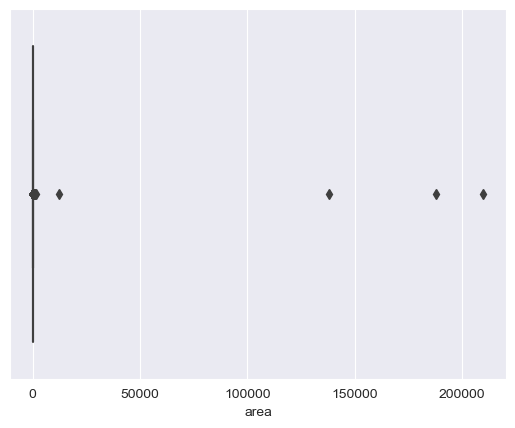

In [38]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=data_df['area'], orient='h')

In [39]:
Q1 = data_df['area'].quantile(0.25)
Q3 = data_df['area'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
print(Q1, Q3, lower_thresh, upper_thresh)

52.0 79.5 10.75 120.75


In [40]:
# Based on the above calculation, we will remove samples that have "area" strictly above 121 (> 121) as outliers
data_df.drop(data_df[data_df['area'] > 121].index, inplace=True)
data_df.shape

(13680, 14)

<Axes: xlabel='area', ylabel='Count'>

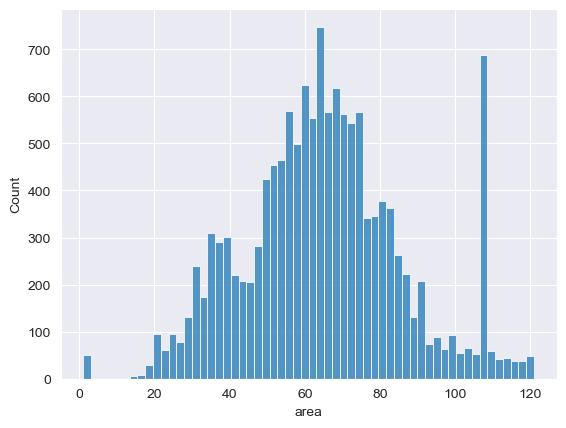

In [41]:
# check the new distribution of the "area"
sns.histplot(data_df['area'])

## Analyze floor

<Axes: xlabel='floor'>

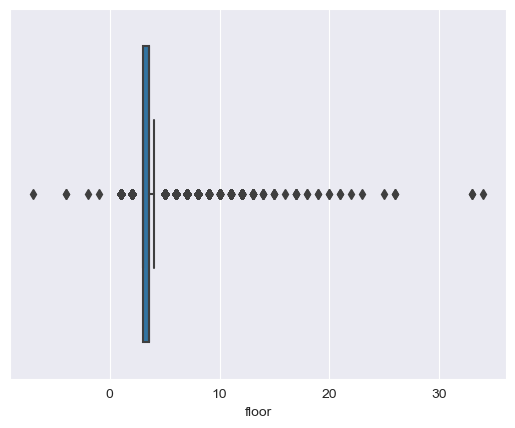

In [42]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=data_df['floor'], orient='h')

In [43]:
Q1 = data_df['floor'].quantile(0.25)
Q3 = data_df['floor'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
print(Q1, Q3, lower_thresh, upper_thresh)

3.0 3.5728018456805946 2.140797231479108 4.432004614201486


In [44]:
# Based on the above calculation, we will remove samples that have "area" strictly above 5 (> 5) as outliers
data_df.drop(data_df[data_df['floor'] > 5].index, inplace=True)
data_df.shape

(12216, 14)

<Axes: xlabel='floor', ylabel='Count'>

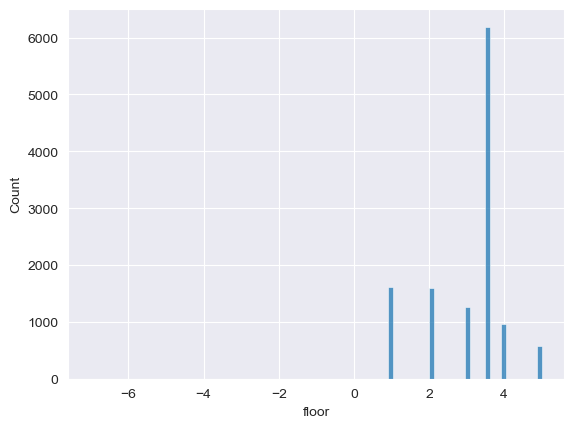

In [45]:
# check the new distribution of the "floor"
sns.histplot(data_df['floor'])

## Analyze total_floors

<Axes: xlabel='total_floors'>

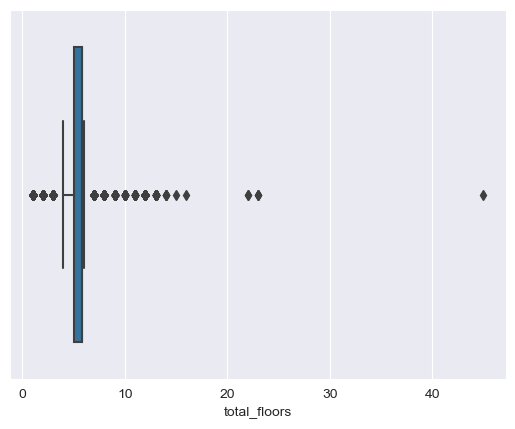

In [46]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=data_df['total_floors'], orient='h')

In [47]:
Q1 = data_df['total_floors'].quantile(0.25)
Q3 = data_df['total_floors'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
print(Q1, Q3, lower_thresh, upper_thresh)

5.0 5.787896678966789 3.818154981549816 6.969741697416973


In [48]:
# Based on the above calculation, we will remove samples that have "area" strictly above 7 (> 7) as outliers
data_df.drop(data_df[data_df['total_floors'] > 7].index, inplace=True)
data_df.shape

(11113, 14)

<Axes: xlabel='total_floors', ylabel='Count'>

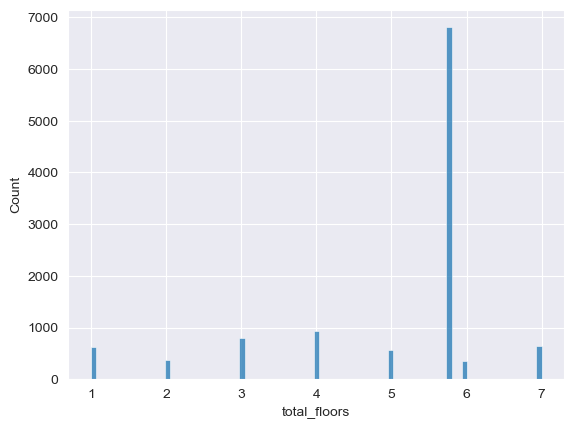

In [49]:
# check the new distribution of the "total floors"
sns.histplot(data_df['total_floors'])

### Data transformation
After performing data cleaning for each data type separately, we will move forward to do data transformation for each data type.

#### Normalize numerical data

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_df['area'] = scaler.fit_transform(data_df[['area']].values)

Normalize Area 

<Axes: xlabel='area', ylabel='Count'>

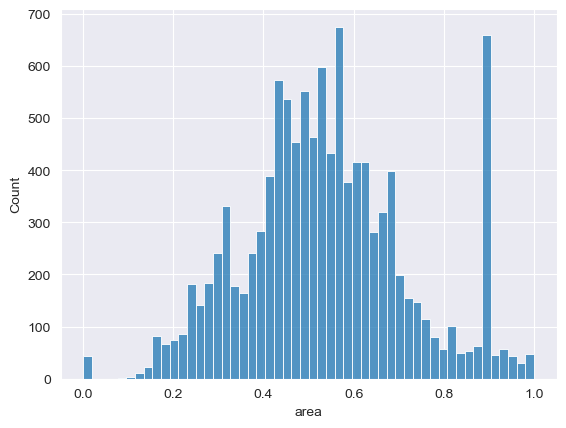

In [51]:
# check the distribution of the "area" (after normalization)
sns.histplot(data_df['area'])

Normalize floor

In [52]:
scaler = MinMaxScaler(feature_range=(0,1))
data_df['floor'] = scaler.fit_transform(data_df[['floor']].values)

<Axes: xlabel='floor', ylabel='Count'>

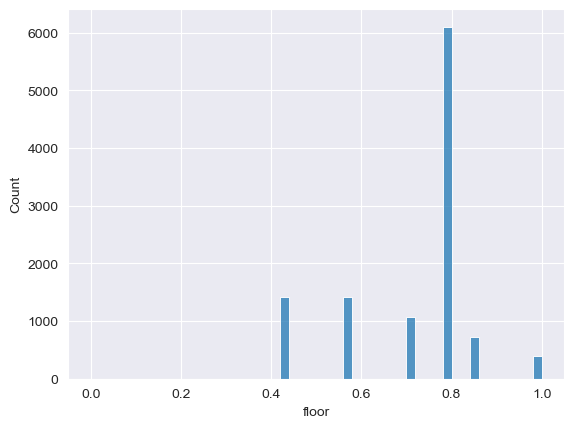

In [53]:
# check the distribution of the "Lot size" (after normalization)
sns.histplot(data_df['floor'])

In [54]:
scaler = MinMaxScaler(feature_range=(0,1))
data_df['total_floors'] = scaler.fit_transform(data_df[['total_floors']].values)

<Axes: xlabel='total_floors', ylabel='Count'>

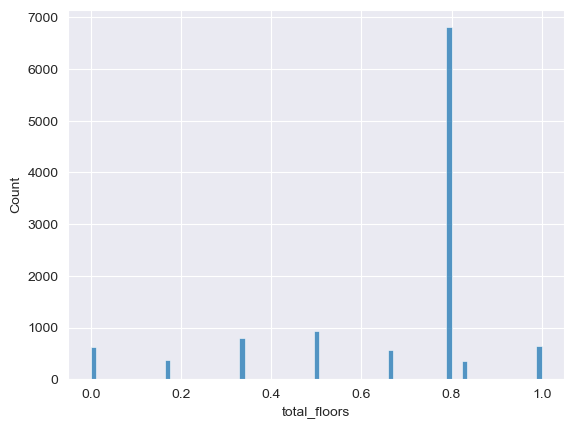

In [55]:
# check the distribution of the "Lot size" (after normalization)
sns.histplot(data_df['total_floors'])

## Feature Engineering
#### Categorical data representation
## encoding (one-hot/ordinal encoder)
- name_nsi
- condition
- certificate
- type
- district

In [56]:
from sklearn.preprocessing import OneHotEncoder

#### name_nsi

In [57]:
data_df['name_nsi'].value_counts()

Bratislava - mestská časť Ružinov        724
Bratislava - mestská časť Staré Mesto    492
Bratislava - mestská časť Petržalka      354
Žilina                                   353
Nitra                                    341
                                        ... 
Krpeľany                                   0
Krompachy                                  0
Kriváň                                     0
Kremnica                                   0
Žitavany                                   0
Name: name_nsi, Length: 598, dtype: int64

In [58]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(data_df[['name_nsi']])

OneHotEncoder(handle_unknown='ignore')

In [59]:
# the categories learned during the fit process
ohe.categories_

[array(['Banka', 'Banská Bystrica', 'Banská Štiavnica', 'Bardejov',
        'Bernolákovo', 'Biely Kostol',
        'Bratislava - mestská časť Devínska Nová Ves',
        'Bratislava - mestská časť Dúbravka',
        'Bratislava - mestská časť Jarovce',
        'Bratislava - mestská časť Karlova Ves',
        'Bratislava - mestská časť Lamač',
        'Bratislava - mestská časť Nové Mesto',
        'Bratislava - mestská časť Petržalka',
        'Bratislava - mestská časť Podunajské Biskupice',
        'Bratislava - mestská časť Rača',
        'Bratislava - mestská časť Ružinov',
        'Bratislava - mestská časť Staré Mesto',
        'Bratislava - mestská časť Vajnory',
        'Bratislava - mestská časť Vrakuňa',
        'Bratislava - mestská časť Záhorská Bystrica', 'Brezno',
        'Brezová pod Bradlom', 'Bytča', 'Bánovce nad Bebravou',
        'Chorvátsky Grob', 'Detva', 'Dolný Kubín', 'Donovaly',
        'Dubnica nad Váhom', 'Dunajská Lužná', 'Dunajská Streda',
        'Dvorníky'

In [60]:
# encode the "name_nsi" with the learned categories during the fit process
ohe.transform(data_df[['name_nsi']]).toarray()[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [61]:
# convert the original "name_nsi" column to the encoded categories
pd.DataFrame(ohe.transform(data_df[['name_nsi']]).toarray()).rename(columns={i: catg for i, catg in enumerate(ohe.categories_[0])})

,Banka,Banská Bystrica,Banská Štiavnica,Bardejov,Bernolákovo,Biely Kostol,Bratislava - mestská časť Devínska Nová Ves,Bratislava - mestská časť Dúbravka,Bratislava - mestská časť Jarovce,Bratislava - mestská časť Karlova Ves,...,Zvolen,Čadca,Šahy,Šamorín,Šaľa,Štrba,Štúrovo,Šurany,Žiar nad Hronom,Žilina
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### condition

In [62]:
data_df['condition'].value_counts()

Complete reconstruction    3158
New building               3085
Partial reconstruction     2682
Original condition         1511
Under construction          335
Development project          44
Name: condition, dtype: int64

In [63]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(data_df[['condition']])

OneHotEncoder(handle_unknown='ignore')

In [64]:
# the categories learned during the fit process
ohe.categories_

[array(['Complete reconstruction', 'Development project', 'New building',
        'Original condition', 'Partial reconstruction',
        'Under construction', nan], dtype=object)]

In [65]:
# encode the "condition" with the learned categories during the fit process
ohe.transform(data_df[['condition']]).toarray()[0]

array([0., 0., 0., 0., 1., 0., 0.])

In [66]:
# convert the original "condition" column to the encoded categories
pd.DataFrame(ohe.transform(data_df[['condition']]).toarray()).rename(columns={i: catg for i, catg in enumerate(ohe.categories_[0])})

,Complete reconstruction,Development project,New building,Original condition,Partial reconstruction,Under construction,NaN
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
11108,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11109,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11110,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11111,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### certificate

In [67]:
data_df['certificate'].value_counts()

none    2594
A       1027
B        638
C         98
G         37
D         14
E          5
F          0
Name: certificate, dtype: int64

In [68]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(data_df[['certificate']])

OneHotEncoder(handle_unknown='ignore')

In [69]:
# the categories learned during the fit process
ohe.categories_

[array(['A', 'B', 'C', 'D', 'E', 'G', 'none', nan], dtype=object)]

In [70]:
# encode the "certificate" with the learned categories during the fit process
ohe.transform(data_df[['certificate']]).toarray()[0]

array([0., 0., 0., 0., 0., 0., 0., 1.])

In [71]:
# convert the original "certificate" column to the encoded categories
pd.DataFrame(ohe.transform(data_df[['certificate']]).toarray()).rename(columns={i: catg for i, catg in enumerate(ohe.categories_[0])})

,A,B,C,D,E,G,none,NaN
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
11108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11109,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### type

In [72]:
data_df['type'].value_counts()

3-room apartment            4283
2-room apartment            4228
1-room apartment            1379
4-room apartment             876
Studio                       307
5 or more room apartment      40
Name: type, dtype: int64

In [73]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(data_df[['type']])

OneHotEncoder(handle_unknown='ignore')

In [74]:
# the categories learned during the fit process
ohe.categories_

[array(['1-room apartment', '2-room apartment', '3-room apartment',
        '4-room apartment', '5 or more room apartment', 'Studio'],
       dtype=object)]

In [75]:
# encode the "type" with the learned categories during the fit process
ohe.transform(data_df[['type']]).toarray()[0]

array([1., 0., 0., 0., 0., 0.])

In [76]:
# convert the original "type" column to the encoded categories
pd.DataFrame(ohe.transform(data_df[['type']]).toarray()).rename(columns={i: catg for i, catg in enumerate(ohe.categories_[0])})

,1-room apartment,2-room apartment,3-room apartment,4-room apartment,5 or more room apartment,Studio
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
11108,0.0,1.0,0.0,0.0,0.0,0.0
11109,0.0,1.0,0.0,0.0,0.0,0.0
11110,0.0,0.0,0.0,1.0,0.0,0.0
11111,0.0,0.0,1.0,0.0,0.0,0.0


#### district

In [77]:

data_df['district'].value_counts()

Bratislava II      982
Bratislava IV      558
Bratislava I       492
Senec              471
Dunajská Streda    413
                  ... 
Sabinov              0
Tvrdošín             0
Svidník              0
Stará Ľubovňa        0
Stropkov             0
Name: district, Length: 79, dtype: int64

In [78]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(data_df[['district']])

OneHotEncoder(handle_unknown='ignore')

In [79]:
# the categories learned during the fit process
ohe.categories_

[array(['Banská Bystrica', 'Banská Štiavnica', 'Bardejov', 'Bratislava I',
        'Bratislava II', 'Bratislava III', 'Bratislava IV', 'Bratislava V',
        'Brezno', 'Bytča', 'Bánovce nad Bebravou', 'Detva', 'Dolný Kubín',
        'Dunajská Streda', 'Galanta', 'Hlohovec', 'Humenné', 'Ilava',
        'Kežmarok', 'Komárno', 'Košice - okolie', 'Košice I', 'Košice II',
        'Košice III', 'Košice IV', 'Kysucké Nové Mesto', 'Levice',
        'Levoča', 'Liptovský Mikuláš', 'Lučenec', 'Malacky', 'Martin',
        'Medzilaborce', 'Michalovce', 'Myjava', 'Nitra',
        'Nové Mesto nad Váhom', 'Nové Zámky', 'Partizánske', 'Pezinok',
        'Piešťany', 'Poltár', 'Poprad', 'Považská Bystrica', 'Prešov',
        'Prievidza', 'Púchov', 'Revúca', 'Rimavská Sobota', 'Rožňava',
        'Ružomberok', 'Senec', 'Senica', 'Skalica', 'Snina', 'Sobrance',
        'Spišská Nová Ves', 'Topoľčany', 'Trebišov', 'Trenčín', 'Trnava',
        'Turčianske Teplice', 'Veľký Krtíš', 'Vranov nad Topľou',
       

In [80]:
# encode the "district" with the learned categories during the fit process
ohe.transform(data_df[['district']]).toarray()[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [81]:
# convert the original "district" column to the encoded categories
pd.DataFrame(ohe.transform(data_df[['district']]).toarray()).rename(columns={i: catg for i, catg in enumerate(ohe.categories_[0])})

,Banská Bystrica,Banská Štiavnica,Bardejov,Bratislava I,Bratislava II,Bratislava III,Bratislava IV,Bratislava V,Brezno,Bytča,...,Turčianske Teplice,Veľký Krtíš,Vranov nad Topľou,Zlaté Moravce,Zvolen,Čadca,Šaľa,Žarnovica,Žiar nad Hronom,Žilina
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Combining the onehotencoded categories into a new dataset named "result_df"

In [82]:
categorical_columns = ['district', 'type', 'name_nsi', 'certificate', 'condition']
ohe = OneHotEncoder()
encoded_array = ohe.fit_transform(data_df[categorical_columns]).toarray()
feature_names = ohe.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded_array, columns=feature_names)
result_df = pd.concat([data_df, encoded_df], axis=1)
print(result_df)

      name_nsi     price     index                condition      area  \
2      Štúrovo  107000.0  8.300000   Partial reconstruction  0.325000   
3      Štúrovo  105000.0  7.834874  Complete reconstruction  0.625000   
4      Štúrovo   82000.0  7.834874   Partial reconstruction  0.516667   
5      Štúrovo  102000.0  7.834874  Complete reconstruction  0.629167   
6      Štúrovo  129000.0  8.200000  Complete reconstruction  0.516667   
...        ...       ...       ...                      ...       ...   
11104      NaN       NaN       NaN                      NaN       NaN   
11108      NaN       NaN       NaN                      NaN       NaN   
11109      NaN       NaN       NaN                      NaN       NaN   
11110      NaN       NaN       NaN                      NaN       NaN   
11111      NaN       NaN       NaN                      NaN       NaN   

       provision certificate  total_floors     floor  lift  ...  \
2            0.0         NaN      0.666667  0.714286   0

## Addtional Analysis

In [83]:
# Houses could have different types, here are the top types:
data_df['type'].value_counts()

3-room apartment            4283
2-room apartment            4228
1-room apartment            1379
4-room apartment             876
Studio                       307
5 or more room apartment      40
Name: type, dtype: int64

We want to calculate "price per living sqft" from the current features, an important measurement of final house price. Let's check the differences between different house types.

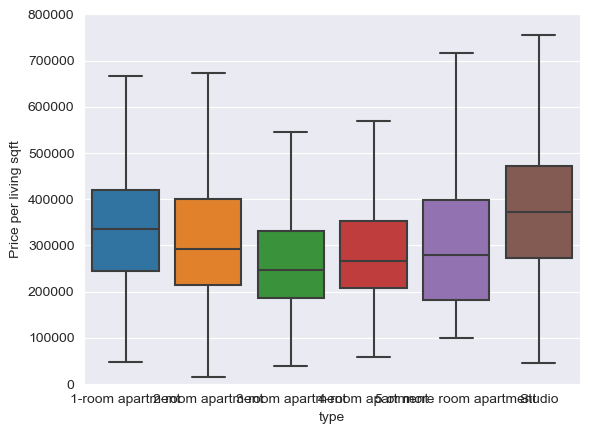

In [84]:
common_types = data_df['type'].isin(['3-room apartment', '2-room apartment', '1-room apartment', 
                                     '4-room apartment', 'Studio', '5 or more room apartment'])
data_df['Price per living sqft'] = data_df['price'] / data_df['area']
ax = sns.boxplot(x='type', y='Price per living sqft', data=data_df[common_types], fliersize=0)
ax.set_ylim([0, 800000]);

It looks like 3 rooms apartment has the lowest median whereas studio has the highest median 

Sale price per living sqft is often related with house locations. Let's check the price for the top 20 zip codes.

In [85]:
data_df['name_nsi'].value_counts()[:20]

Bratislava - mestská časť Ružinov        724
Bratislava - mestská časť Staré Mesto    492
Bratislava - mestská časť Petržalka      354
Žilina                                   353
Nitra                                    341
Trnava                                   331
Nové Zámky                               296
Trenčín                                  285
Bratislava - mestská časť Nové Mesto     266
Banská Bystrica                          265
Dunajská Streda                          259
Komárno                                  242
Martin                                   227
Prešov                                   212
Zvolen                                   200
Bratislava - mestská časť Dúbravka       190
Levice                                   176
Prievidza                                171
Piešťany                                 164
Galanta                                  149
Name: name_nsi, dtype: int64

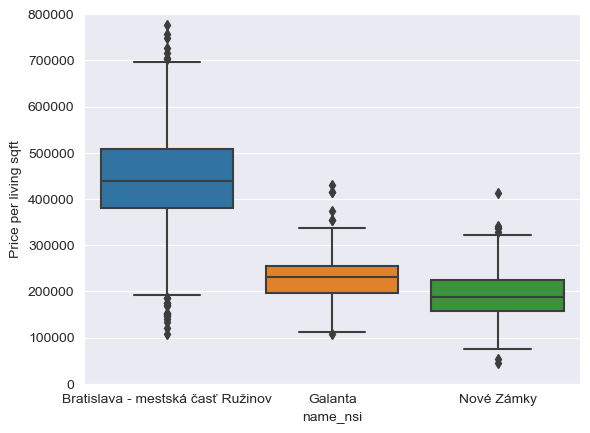

In [86]:
data_df['name_nsi'] = data_df['name_nsi'].astype('string')
data_df['Price per living sqft'] = data_df['price'] / data_df['area']
mask = data_df['name_nsi'].isin(['Bratislava - mestská časť Ružinov','Nové Zámky', 'Galanta'])
ax = sns.boxplot(x='name_nsi', y='Price per living sqft', data=data_df[mask])
ax.set_ylim([0, 800000]);

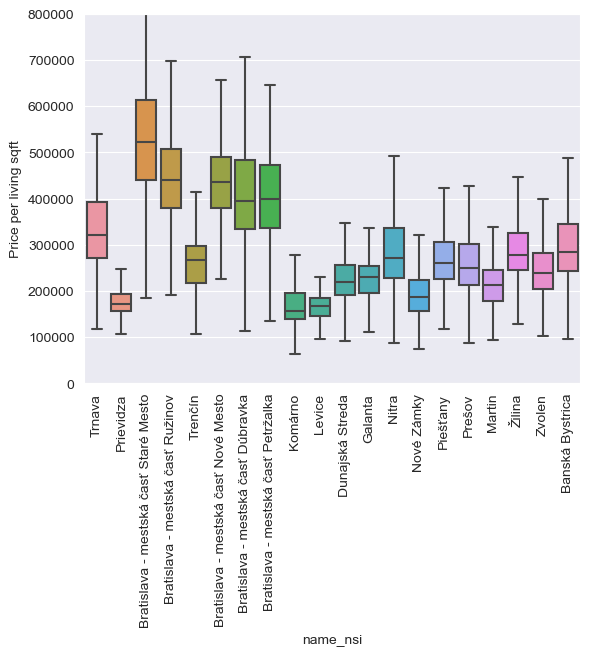

In [87]:
d = data_df[data_df['name_nsi'].isin(data_df['name_nsi'].value_counts()[:20].keys())]
ax = sns.boxplot(x='name_nsi', y='Price per living sqft', data=d, fliersize=0)
ax.set_ylim([0, 800000])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

## Correlation between numeric columns
- price           float64
- index           float64
- area            float64
- total_floors    float64
- floor           float64
- rooms           float64

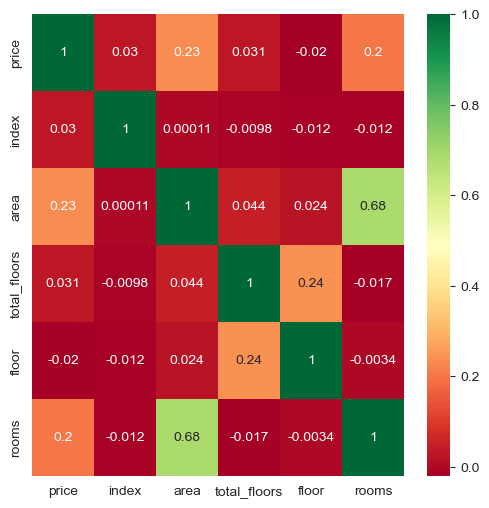

In [88]:
_, ax = plt.subplots(figsize=(6,6))
columns = ['price', 'index', 'area', 'total_floors', 'floor', 'rooms']
sns.heatmap(data_df[columns].corr(),annot=True,cmap='RdYlGn', ax=ax);




# discussion of important observations
- Originally my data had (15403, 27) 15403 samples with 27 features. However, a lot of my features contained null values, so I dropped the columns with 70% null values, thus left a dataset with 14 features. And then, after cleaning and dropping outliers, my data left with a 13978 samples.
- My dataset contained both categorical data as well as numeric data. 
    - categorical = (['district', 'type', 'name_nsi', 'certificate', 'condition'])
    - num_value = (['price', 'index', 'area', 'provision', 'total_floors', 'floor', 'lift', 'cellar', 'rooms' ])
- Looking at my "additional analysis", it looks like 3 rooms apartment has the lowest median, whereas studio has the highest median
    - In addition, "Mesto" community has the highest median price per living sqrt and "Komarno" has the lowest median.
- According to the heat map, price is closely related to rooms and area, and it is not related to floor, total_floors, and index. 